# Cambio de variable u
## integral 1: con f(u)
### derivada a: ajuste 13

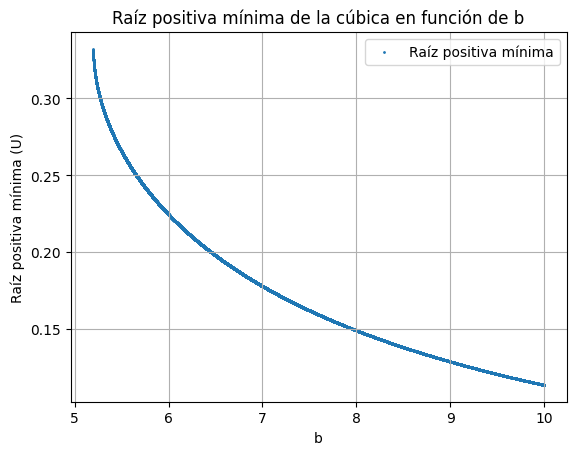

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los coeficientes de la cúbica
def coeficientes_cubica(b, m):
    # Ecuación: -2*m*b^2*u^3 + b^2*u^2 + 0*u - 1 = 0
    return [-2 * m * b**2, b**2, 0, -1]

# Parámetros
m = 1
inicio = 3 * (3**(1/2)) * m
fin = 10 * m
paso = 0.0001
valores_b = np.arange(inicio, fin, paso)


# Lista para almacenar las raíces positivas más pequeñas
valores_U_minima = []

#Para cada valor de se resuelve ecuacion cubica para u
for b in valores_b:
    coefs = coeficientes_cubica(b, m)
    # Encontrar todas las raíces (reales y complejas)
    raices = np.roots(coefs)
    # Filtrar raíces reales positivas
    raices_reales_positivas = raices[np.isreal(raices) & (raices.real > 0)].real
    # Seleccionar la raíz positiva más pequeña si existe
    if len(raices_reales_positivas) > 0:
        raiz_minima = min(raices_reales_positivas)
        valores_U_minima.append(raiz_minima)
    else:
        # Si no hay raíces positivas, agregar NaN
        valores_U_minima.append(np.nan)

# Graficar los resultados
valores_U_minima = np.array(valores_U_minima)
plt.scatter(valores_b, valores_U_minima, label="Raíz positiva mínima", s=1)
plt.xlabel("b")
plt.ylabel("Raíz positiva mínima (U)")
plt.title("Raíz positiva mínima de la cúbica en función de b")
plt.legend()
plt.grid()
plt.show()


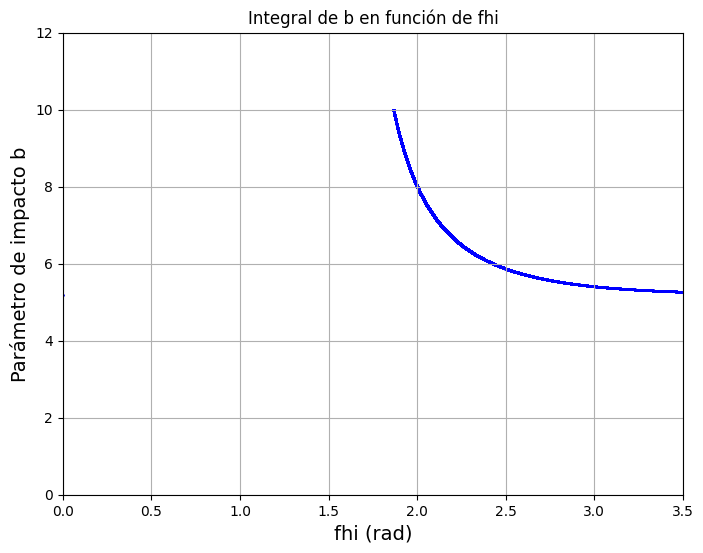

In [2]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt


def f(u, m):
    return 1-2*m*u
    
# Este es el integrando
def integrando(u, b, m):
    fu = f(u,m)
    un = 1 / (b**2) - (u**2) * fu
    #para evitar que salgan imaginarios en la raiz
    if un <= 0:
        return 0
    return 1 / np.sqrt(un)

# Función para calcular la integral
def fhi_b_corrected(b, u_m, m):
    try:
        # Realizar la integración
        integral_result, _ = quad(integrando, 0, u_m, args=(b, m))
        return integral_result
    except Exception as e:
        print(f"Error durante la integración para b={b}: {e}")
        return np.nan  # Devuelve NaN si hay un error

# Parámetros
m = 1

#para cada valor de u critica y su b manda a llamar fhi_b_corrected osea calcula la integral
fhi_values = [fhi_b_corrected(b, valores_U_minima[i], m) for i, b in enumerate(valores_b)]

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(fhi_values,valores_b, color='blue', s=1)
plt.ylabel("Parámetro de impacto b", fontsize=14)
plt.xlabel("fhi (rad)", fontsize=14)
plt.grid(True)
plt.xlim(0, 3.5)
plt.ylim(0, 12)  # Ajustar el límite superior del eje y para una mejor visualización
plt.title("Integral de b en función de fhi")
plt.show()


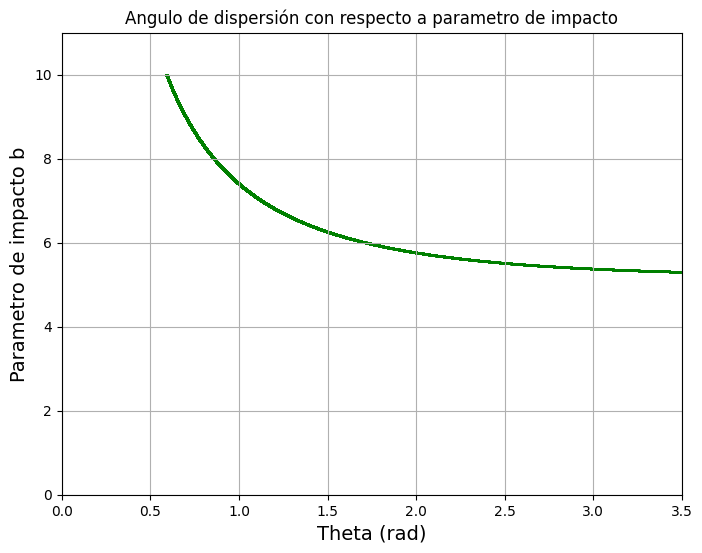

In [3]:
#CALCULO DE THETA=2phi-pi
theta_values = 2 * np.array(fhi_values) - np.pi

plt.figure(figsize=(8, 6))
plt.scatter(theta_values, valores_b, color='green', s=1)
plt.ylabel("Parametro de impacto b", fontsize=14)
plt.xlabel("Theta (rad)", fontsize=14)
plt.grid(True)
plt.xlim(0, 3.5)
plt.ylim(0, 11)
plt.title("Angulo de dispersión con respecto a parametro de impacto")
plt.show()


In [4]:
k = 0
theta_values_1 = []
b_values_1 = []
for i in range (len(theta_values)):
    if theta_values[i] <= np.pi and theta_values[i] >= 0:
      k = k+1
      theta_values_1.append(theta_values[i])
      b_values_1.append(valores_b[i])
theta_values_1 = np.array(theta_values_1)
b_values_1 = np.array(b_values_1)
err = np.zeros_like(theta_values_1)
for i in range(len(theta_values_1)):
    err[i] = 0.1
theta_values_1

array([3.1410429 , 3.14045712, 3.13987173, ..., 0.59041824, 0.59040917,
       0.5904001 ])

In [5]:
def calcular_coeficientes(x, y, err, grad):
    n = grad
    A = np.zeros((n, n))
    b = np.zeros(n)

    for i in range(n):
        for j in range(n):
            A[i, j] = 2*np.sum((x**(i+j))/err)


        b[i] = 2 * np.sum((y * x**i)/err)

    coef = np.linalg.solve(A, b)
    return coef


def evaluar_polinomio(coeficientes, x):
    y = np.zeros_like(x)
    for i in range(len(coeficientes)):
        y += coeficientes[i] * (x ** i)
    return y


coef = calcular_coeficientes(theta_values_1, b_values_1,err,13)
coef

array([ 3.54712786e+01, -1.14730217e+02,  2.33806611e+02, -3.00067164e+02,
        2.52228243e+02, -1.37288355e+02,  4.38516080e+01, -4.26927381e+00,
       -2.66550782e+00,  1.30796600e+00, -2.70911465e-01,  2.80792484e-02,
       -1.17055913e-03])

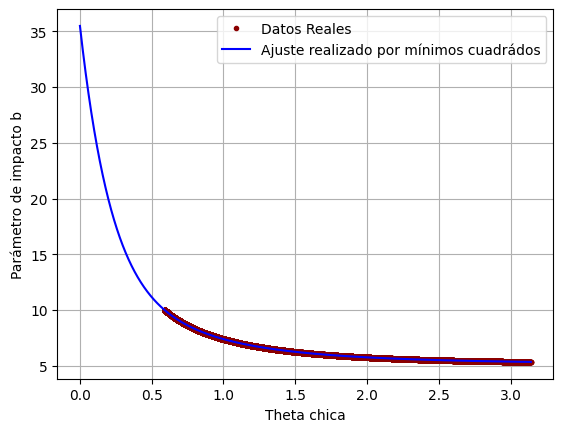

In [6]:
x_1 = np.linspace(0,np.pi,10000)
y_1 = evaluar_polinomio(coef,x_1)
x_1

plt.plot(theta_values_1, b_values_1,'.',label='Datos Reales', color='darkred')
plt.plot(x_1,y_1, label = 'Ajuste realizado por mínimos cuadrádos', color = 'b')
plt.xlabel('Theta chica')
plt.ylabel('Parámetro de impacto b')
plt.legend()
plt.grid()

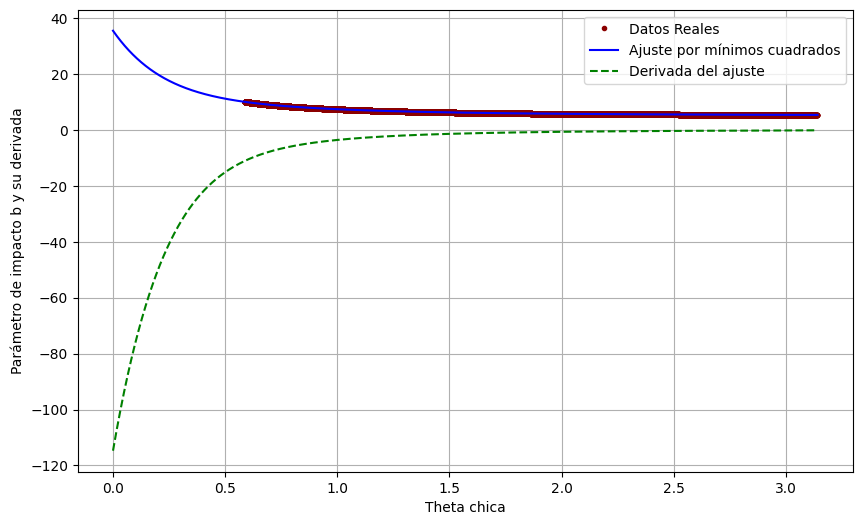

In [7]:
def derivar_polinomio(coeficientes, x):
    """Calcula la derivada de un polinomio y la evalúa."""
    y_derivada = np.zeros_like(x)
    for i in range(1, len(coeficientes)):
        y_derivada += i * coeficientes[i] * (x ** (i - 1))
    return y_derivada

# Calcular la derivada del polinomio ajustado
y_derivada_1 = derivar_polinomio(coef, x_1)

# Graficar la derivada junto con los datos originales y el ajuste
plt.figure(figsize=(10, 6))
plt.plot(theta_values_1, b_values_1, '.', label='Datos Reales', color='darkred')
plt.plot(x_1, y_1, label='Ajuste por mínimos cuadrados', color='b')
plt.plot(x_1, y_derivada_1, label='Derivada del ajuste', color='green', linestyle='--')
plt.xlabel('Theta chica')
plt.ylabel('Parámetro de impacto b y su derivada')
plt.legend()
plt.grid()
plt.show()

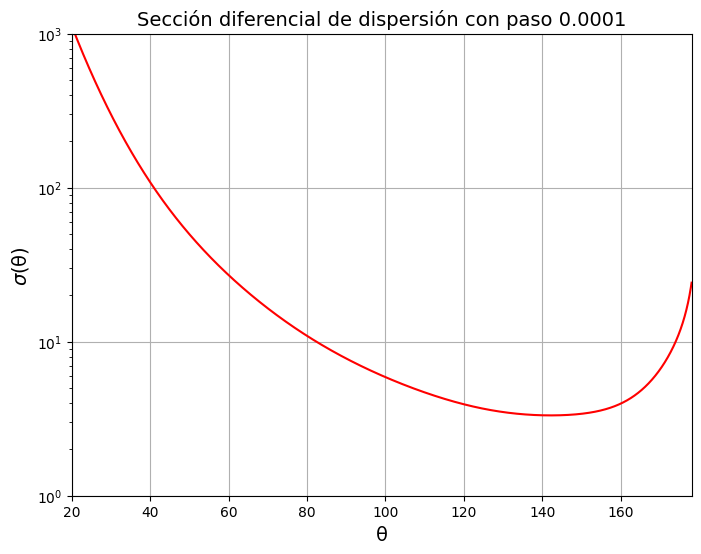

In [8]:
def dsigma(b, db, theta):
    ds = []
    theta_1 = []
    epsilon = 1e-10  # Umbral para evitar divisiones por valores muy pequeños
    for i in range(len(b)):
        if np.abs(np.sin(theta[i])) > epsilon and np.abs(db[i]) > epsilon:
            aux = b[i] / np.sin(theta[i]) * (np.abs(db[i]))
            ds.append(aux)
            theta_1.append(theta[i])
    return np.array(ds), np.array(theta_1)

dsigma_1, theta_1 = dsigma(y_1 ,y_derivada_1, x_1)
theta_1 = np.degrees(theta_1)

plt.figure(figsize=(8, 6))
plt.plot(theta_1, dsigma_1, color='r', label = 'numérico')
plt.yscale('log')
plt.xlabel("θ", fontsize=14)
plt.ylabel("$\sigma$(θ) ", fontsize=14)
plt.title("Sección diferencial de dispersión con paso 0.0001", fontsize=14)
plt.grid(True) # Ajustar el límite superior del eje y para una mejor visualización
plt.xlim(20,178)
plt.ylim(1,10e2)
plt.savefig("u_0.0001.png", dpi=300, bbox_inches='tight')
plt.show()